Examining and Visualizing Photo NMR Data
=============================

<strong>Author(s):</strong> Seth D. Veenbaas, Jessica A. Nash, The Molecular Sciences Software Institute

<div class="alert alert-block alert-info"> 
<h2>Overview</h2>

<strong>Questions:</strong>

* How can I use pandas to process data?

* How can I visualize relationships between different parts of my data?

<strong>Objectives:</strong>

* Use pandas and seaborn to load and analyze photo NMR data

</div>

# Azobenzene Photo-NMR: Understanding Rate Constants

Azobenzene is a fascinating molecule known for its reversible photoisomerization between **E** and **Z** isomers under UV and visible light. This property makes it a model compound for studying light-induced reactions and their kinetics.

![reaction](images/azobenzene_reaction.png)

In a Photo-NMR experiment, we can monitor the interconversion of azobenzene isomers by observing the changes in the NMR signal intensity (peak integrations) over time. These integration values correspond to the relative concentrations of each isomer, allowing us to quantify the reaction kinetics.

### Objective: Calculating the Rate Constant

The goal is to calculate the rate constant \( k \) for the photoisomerization process. Here’s the general approach:

1. **Reaction Kinetics**:

   For a first-order reaction, the rate constant *k* can be calculated using the following equation:
   $$ \ln\left(\frac{Z_t}{Z_0}\right) = -k t $$

   Where:  
   - *Z<sub>t</sub>*: Fraction of Z-isomer at time *t*  
   - *Z<sub>0</sub>*: Initial fraction of Z-isomer before light exposure  
   - *t*: Time of exposure  
   - *k*: Rate constant  

2. **Steps in Python**:
   - Import and visualize the NMR data.
   - Determine the fraction of Z-isomer over the course of the experiment.
   - Fit a first-order kinetic model to calculate the rate constant.


Let's dive into the data and compute the rate constant!



## RDKit Review: Visualize Azobenzene (E) v. (Z)

Let's use RDKit to visualize how the chemical environment changes in different isomers of azobenzene.

In [ ]:
# Import RDkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

In [ ]:
# Create Mol objects for azobenzene
azo_E = Chem.MolFromSmiles(r'N(=N/c1ccccc1)\c2ccccc2')
azo_Z = Chem.MolFromSmiles(r'c1ccc(/N=N\\c2ccccc2)cc1')

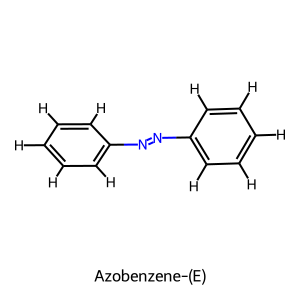

In [47]:
# Add Hydrogen atoms to molecule
azo_E = AllChem.AddHs(azo_E)

# Create a 3D molecule
AllChem.EmbedMolecule(azo_E)

# Minimize energy of molecular conformation
AllChem.MMFFOptimizeMolecule(azo_E)

# Draw molecule
Draw.MolToImage(azo_E, legend='Azobenzene-(E)')

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Generate a 3D representation for the (Z) isomer using the `apo_Z` Mol object we created above.

Compare the chemical environment differences around the protons in each structure.

</div>

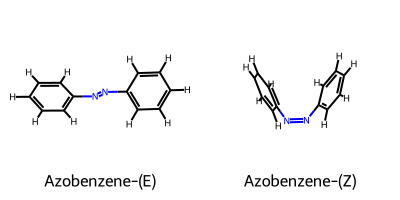

In [ ]:
# Add Hydrogen atoms to molecule
azo_Z = AllChem.AddHs(azo_Z)

# Create a 3D molecule
AllChem.EmbedMolecule(azo_Z)

# Minimize energy of molecular conformation
AllChem.MMFFOptimizeMolecule(azo_Z)


# View both isomers next to each other
Draw.MolsToGridImage(mols=[azo_E, azo_Z], legends=['Azobenzene-(E)', 'Azobenzene-(Z)'], molsPerRow=2)

## Pandas: Data manipulation and analysis

Pandas is very powerful Python library used for data analysis and manipulation. Pandas is ubiquitous in the world of data science and today we will use it to examine and analyze data from a photo NMR experiment.

For information on Pandas, refer to the [Pandas documentation](https://pandas.pydata.org/docs/) or the [10 minutes to pandas guide](https://pandas.pydata.org/docs/user_guide/10min.html).

### Dataframe

The central data structure of pandas is called a DataFrame. You can think of a Dataframe as an Excel spreadsheet that contains data in columns and rows.

|           | index | column_1 | column_2 | ... |
| :-------: | :---: | :------: | :------: | :-: |
| **row_1** |   0   |   data   |   data   | ... |
| **row_2** |   1   |   data   |   data   | ... |
| **row_3** |   2   |   data   |   data   | ... |
|    ...    |  ...  |   ...    |   ...    | ... |

## Import packages/libraries

Let's import `pandas`, `numpy`, and the plotting package `matplotlib` using their standard abbreviations `pd`, `np`, and `plt`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading a CSV File

Pandas makes it simple to read and work with datasets in spreadsheets (CSV or XLSX format).  
The primary function for reading CSV files is `pd.read_csv()`.

Let's create a Dataframe using our NMR kinetics data.

In [2]:
azobenzene_data = pd.read_csv('data/azobenzene_photo_nmr.csv')

## Examining Data with `head()` and `tail()`

You can see a preview of your Dataframe using the `head()` or `tail()` method. By default `head()` or `tail()` display the first or last 5 rows of the Dataframe. You can display more rows by passing an `int` as an argument to either method.

Let's look at the first 10 rows of our Dataframe.

,time(min),E_avg_signal,Z_avg_signal,E_fraction,Z_fraction,seconds,ln_Zt_Z0,k,lnE,ln_Zpss_Zt
10,10,15248.83333,1265.546667,0.923367,0.076633,600,6.922640,-0.011538,-0.079729,-2.326571
11,11,15186.37083,1369.560000,0.917277,0.082723,660,6.999112,-0.010605,-0.086346,-2.390982
12,12,15059.14583,1422.262500,0.913705,0.086295,720,7.041383,-0.009780,-0.090247,-2.430782
13,13,15016.63750,1499.094167,0.909232,0.090768,780,7.091915,-0.009092,-0.095155,-2.482964
14,14,14953.22500,1549.264167,0.906119,0.093881,840,7.125636,-0.008483,-0.098584,-2.520960
15,15,14886.48333,1592.330000,0.903371,0.096629,900,7.154490,-0.007949,-0.101622,-2.555749
16,16,14841.83333,1664.465833,0.899162,0.100838,960,7.197129,-0.007497,-0.106292,-2.611494
17,17,14814.27083,1722.278333,0.895850,0.104150,1020,7.229442,-0.007088,-0.109982,-2.657644
18,18,14792.54583,1760.857500,0.893626,0.106374,1080,7.250576,-0.006713,-0.112468,-2.689886
19,19,14731.97500,1782.589167,0.892060,0.107940,1140,7.265191,-0.006373,-0.114222,-2.713225


In [ ]:
azobenzene_data.head(10)

,time(min),E_avg_signal,Z_avg_signal,E_fraction,Z_fraction,seconds,ln_Zt_Z0,k,lnE,ln_Zpss_Zt
0,0,16575.02917,1.251523,0.999924,0.000076,0,0.000000,NaN,-0.000076,-1.747623
1,1,16295.40417,231.987333,0.985963,0.014037,60,5.225276,-0.087088,-0.014136,-1.831167
2,2,16106.03333,403.315000,0.975571,0.024429,120,5.779403,-0.048162,-0.024733,-1.898231
3,3,15960.24583,532.000000,0.967742,0.032258,180,6.057365,-0.033652,-0.032789,-1.951890
4,4,15867.68750,658.157500,0.960174,0.039826,240,6.268131,-0.026117,-0.040641,-2.006659
5,5,15730.74167,767.407500,0.953485,0.046515,300,6.423382,-0.021411,-0.047631,-2.057694
6,6,15640.22083,870.471667,0.947278,0.052722,360,6.548639,-0.018191,-0.054162,-2.107501
7,7,15551.18750,994.274167,0.939907,0.060093,420,6.679513,-0.015904,-0.061975,-2.170071
8,8,15433.56250,1075.960000,0.934828,0.065172,480,6.760643,-0.014085,-0.067393,-2.215574
9,9,15340.89167,1172.388333,0.929003,0.070997,540,6.846245,-0.012678,-0.073643,-2.270444


<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Display the last 8 rows of the `azobenezene_data` Dataframe.

</div>

In [57]:
azobenzene_data.tail(8)

,time(min),E_avg_signal,Z_avg_signal,E_fraction,Z_fraction,seconds,ln_Zt_Z0,k,lnE,ln_Zpss_Zt
112,112,13609.15417,2871.081667,0.825786,0.174214,6720,7.743894,-0.001152,-0.191419,-9.916117
113,113,13635.74167,2889.941667,0.825124,0.174876,6780,7.747688,-0.001143,-0.192221,NaN
114,114,13609.90000,2857.050000,0.826498,0.173502,6840,7.739802,-0.001132,-0.190558,-7.180976
115,115,13609.61667,2890.835000,0.824803,0.175197,6900,7.749525,-0.001123,-0.192611,NaN
116,116,13604.82500,2888.810000,0.824853,0.175147,6960,7.749237,-0.001113,-0.192550,NaN
117,117,13605.49583,2891.838333,0.824709,0.175291,7020,7.750061,-0.001104,-0.192725,NaN
118,118,13612.03333,2883.746667,0.825183,0.174817,7080,7.747353,-0.001094,-0.192150,NaN
119,119,13629.51250,2911.611667,0.823977,0.176023,7140,7.754224,-0.001086,-0.193612,NaN


## Evaluating Expressions with `eval()`

The `eval()` method lets you evaluate expressions as strings. This is especially useful when you want to create multiple columns or use complex operations concisely.

The following arithmetic operations are supported: `+`, `-`, `*`, `/`, `**`, `%`, `//` along with the following boolean operations: `|` (or), `&` (and), and `~` (not). 

Let's create new columns for the fraction of each isomer (E or Z) present at each time point.

In [3]:
azobenzene_data = azobenzene_data.eval("""
    E_fraction = E_avg_signal / (E_avg_signal + Z_avg_signal)
    Z_fraction = Z_avg_signal / (E_avg_signal + Z_avg_signal)
""")

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Examine how the `eval()` statement changed our Dataframe.
Use the `head()` function to display the first 15 rows of `azobenzene_data`. 

</div>

In [24]:
azobenzene_data.head(15)

,time(min),E_avg_signal,Z_avg_signal,E_fraction,Z_fraction,seconds,ln_Zt_Z0,k,lnE
0,0,16575.02917,1.251523,0.999924,0.000076,0,0.000000,NaN,-0.000076
1,1,16295.40417,231.987333,0.985963,0.014037,60,5.225276,-0.087088,-0.014136
2,2,16106.03333,403.315000,0.975571,0.024429,120,5.779403,-0.048162,-0.024733
3,3,15960.24583,532.000000,0.967742,0.032258,180,6.057365,-0.033652,-0.032789
4,4,15867.68750,658.157500,0.960174,0.039826,240,6.268131,-0.026117,-0.040641
5,5,15730.74167,767.407500,0.953485,0.046515,300,6.423382,-0.021411,-0.047631
6,6,15640.22083,870.471667,0.947278,0.052722,360,6.548639,-0.018191,-0.054162
7,7,15551.18750,994.274167,0.939907,0.060093,420,6.679513,-0.015904,-0.061975
8,8,15433.56250,1075.960000,0.934828,0.065172,480,6.760643,-0.014085,-0.067393
9,9,15340.89167,1172.388333,0.929003,0.070997,540,6.846245,-0.012678,-0.073643


# Visualizing Data with `DataFrame.plot()`

Pandas makes data visualization easy with its built-in `plot()` method. This method provides a convenient interface to create a variety of plots directly from a DataFrame or Series without needing extensive setup.

### Key Features of `DataFrame.plot()`

- **Ease of Use**: Quickly create line plots, bar charts, scatter plots, and more.
- **Built for DataFrames**: Automatically uses column names as labels and handles indexing seamlessly.

### Using the `x` and `y` Arguments

- **`x`**: The column to use for the x-axis (independent variable).
- **`y`**: The column(s) to use for the y-axis (dependent variable).

<Axes: xlabel='time(min)'>

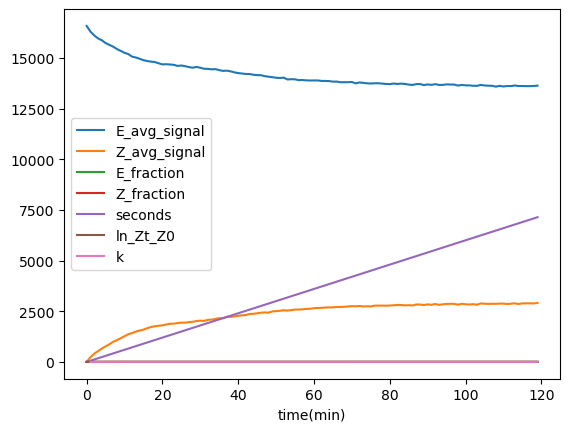

In [24]:
azobenzene_data.plot(x='time(min)')

## Introduction to Matplotlib

Matplotlib is a popular Python library used for creating static, interactive, and animated visualizations. It is especially useful in scientific computing for generating publication-quality graphs and plots. Matplotlib works seamlessly with NumPy, pandas, and other data-handling libraries, making it an excellent choice for visualizing chemical data.


### Why Use Matplotlib?

- **Versatility:** Supports various types of plots like scatter, line, bar, and histogram.
- **Customization:** You can control every aspect of the figure, such as colors, labels, and markers.

Let’s start with a brief tutorial on creating a scatter plot.


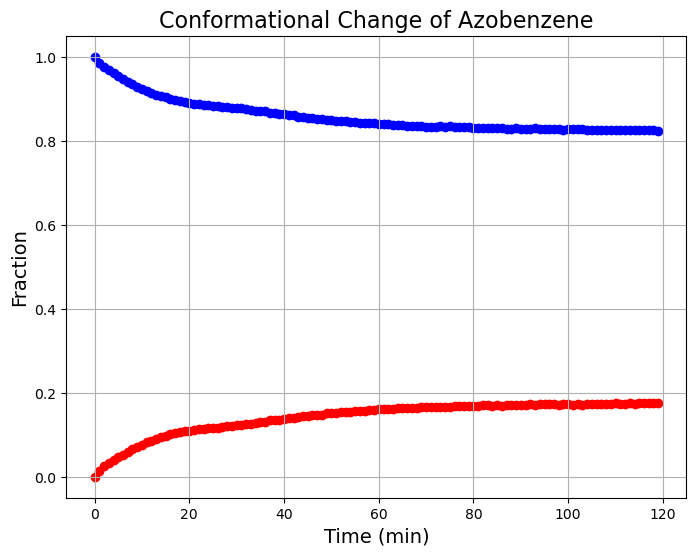

In [ ]:
# Create a blank figure
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot E_fraction as a scatter plot
plt.scatter(
    azobenzene_data['time(min)'],
    azobenzene_data['E_fraction'],
    color='blue',
    label='E Fraction'
)

# Plot Z_fraction as a scatter plot
plt.scatter(
    azobenzene_data['time(min)'],
    azobenzene_data['Z_fraction'],
    color='red',
    label='Z Fraction'
)

# Add labels, title, and legend
plt.xlabel('Time (min)', fontsize=14)
plt.ylabel('Fraction', fontsize=14)
plt.title('Conformational Change of Azobenzene', fontsize=16)

# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.show()


<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Modify the code below to customize the plot to your preference. 

Ideas of things to change:
- figsize
- color
- labels
- title
- fontsize
- add a legend: `plt.legend(fontsize=12)`
- limit the x-axis: `plt.xlim(left=0, right=20)`
- grid

</div>

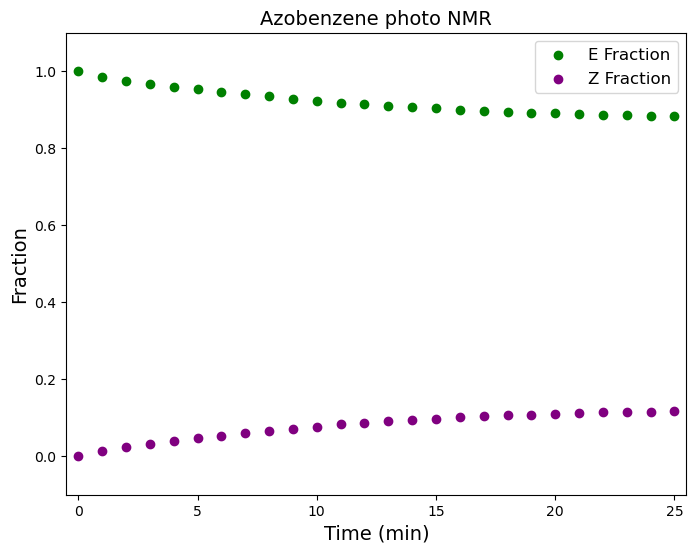

In [19]:
# Create a blank figure
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot E_fraction as a scatter plot
plt.scatter(
    azobenzene_data['time(min)'],
    azobenzene_data['E_fraction'],
    color='green',
    label='E Fraction'
)

# Plot Z_fraction as a scatter plot
plt.scatter(
    azobenzene_data['time(min)'],
    azobenzene_data['Z_fraction'],
    color='purple',
    label='Z Fraction'
)

# Add labels, title, and legend
plt.xlim(left=-0.5, right=25.5)
plt.ylim(bottom=-0.1, top=1.1)
plt.xlabel('Time (min)', fontsize=14)
plt.ylabel('Fraction', fontsize=14)
plt.title('Azobenzene photo NMR', fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.grid(False)  # Add a grid for better readability
plt.show()

## Equation for 1<sup>st</sup> Rate Calculation

The rate constant *k* can be calculated using the following equation:
$$ \ln\left(\frac{Z_t}{Z_0}\right) = -k t $$

Rearranging to solve for *k*:
$$ k = -\frac{\ln\left(\frac{Z_t}{Z_0}\right)}{t} $$

Where:  
- *Z<sub>t</sub>*: Fraction of Z-isomer at time *t*  
- *Z<sub>0</sub>*: Initial fraction of Z-isomer before light exposure  
- *t*: Time of exposure (seconds)
- *k*: Rate  

Let's create new columns in our Dataframe with all the variables we need to determine the instantaneous rate for our reaction.

In [27]:
# t: Time of exposure (seconds)
azobenzene_data['seconds'] = azobenzene_data['time(min)'] * 60

z_0 = azobenzene_data['Z_fraction'][0]

# ln(Zt/Z0)
azobenzene_data['ln_Zt_Z0'] = np.log(azobenzene_data['Z_fraction'] / z_0)

z_pss = 0.174263
azobenzene_data['ln_Zpss_Zt'] = np.log(z_pss - azobenzene_data['Z_fraction'])

# Exercise
# k: Rate constant 
azobenzene_data['k'] = - azobenzene_data['ln_Zt_Z0'] / azobenzene_data['seconds']

/home/sdveenbaas/anaconda3/envs/nmr/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='seconds'>

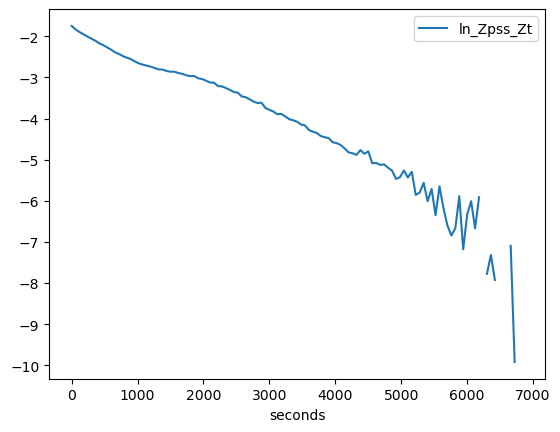

In [28]:
azobenzene_data.plot(x='seconds', y='ln_Zpss_Zt')

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

The instantaneous rate constant for our reaction should change over time. Use the `Dataframe.plot()` method to plot the instantaneous rate (`k)` vs time (`time(min)` or `seconds`). 

**Tip**: Use the `x` and `y` arguments.

</div>

In [20]:
azobenzene_10_min_data = azobenzene_data[azobenzene_data['time(min)'].between(0,5)]
rate_10_min = azobenzene_10_min_data['k'].mean()
print(rate_10_min, 's^-1')

-0.04328602655213041 s^-1


<Axes: xlabel='seconds'>

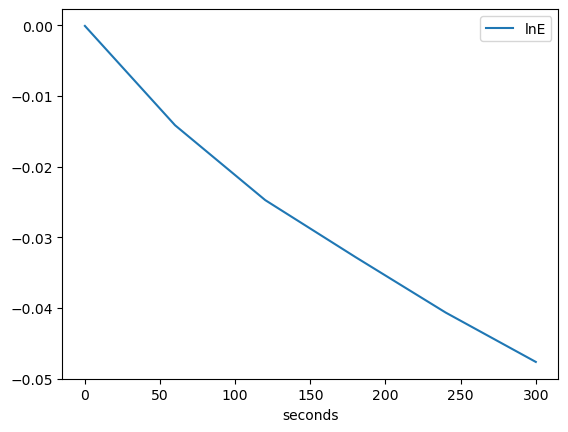

In [14]:
azobenzene_data['lnE'] = np.log(azobenzene_data['E_fraction'])
azobenzene_data_5_min = azobenzene_data[azobenzene_data['time(min)'].between(0,5)]
azobenzene_data_5_min.plot(x='seconds', y='lnE')

## Examining Data Part 2

- `.info()`: Provides a summary of the DataFrame, including data types and non-null counts.
- `.describe()`: Generates descriptive statistics for numeric columns.

In [27]:
azobenzene_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time(min)     120 non-null    int64  
 1   E_avg_signal  120 non-null    float64
 2   Z_avg_signal  120 non-null    float64
 3   E_fraction    120 non-null    float64
 4   Z_fraction    120 non-null    float64
 5   seconds       120 non-null    int64  
 6   ln_Zt_Z0      120 non-null    float64
 7   k             119 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 7.6 KB


In [25]:
azobenzene_data.describe()

,time(min),E_avg_signal,Z_avg_signal,E_fraction,Z_fraction,seconds,ln_Zt_Z0,k
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,119.000000
mean,59.500000,14176.960034,2339.165164,0.858356,0.141644,3570.000000,7.421994,0.004963
std,34.785054,665.863470,659.080685,0.039951,0.039951,2087.103256,0.798704,0.009917
min,0.000000,13579.108330,1.251523,0.823977,0.000076,0.000000,0.000000,0.001086
25%,29.750000,13688.464583,2021.735625,0.828979,0.122491,1785.000000,7.391640,0.001439
50%,59.500000,13885.333330,2636.426666,0.840414,0.159586,3570.000000,7.656179,0.002128
75%,89.250000,14512.470835,2818.604583,0.877509,0.171021,5355.000000,7.725399,0.004042
max,119.000000,16575.029170,2911.611667,0.999924,0.176023,7140.000000,7.754224,0.087088


## Possible RDkit review

Display molecule in 3D to illustrate why chemical shifts change in the E and Z isomers.

In [111]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

In [107]:
azo_E = Chem.MolFromSmiles('N(=N/c1ccccc1)\c2ccccc2')
azo_Z = Chem.MolFromSmiles('c1ccc(/N=N\\c2ccccc2)cc1')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_98835/2324863726.py:1: SyntaxWarning: invalid escape sequence '\c'
  azo_E = Chem.MolFromSmiles('N(=N/c1ccccc1)\c2ccccc2')


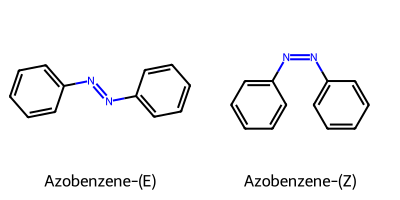

In [108]:
Draw.MolsToGridImage(mols=[azo_E, azo_Z], legends=['Azobenzene-(E)', 'Azobenzene-(Z)'], molsPerRow=2)

In [114]:
# Add Hydrogen atoms to molecule
azo_E = AllChem.AddHs(azo_E)
azo_Z = AllChem.AddHs(azo_Z)

# Create a 3D molecule
AllChem.EmbedMolecule(azo_E)
AllChem.EmbedMolecule(azo_Z)

# Minimize energy of molecular conformation
AllChem.MMFFOptimizeMolecule(azo_E)
AllChem.MMFFOptimizeMolecule(azo_Z)

0

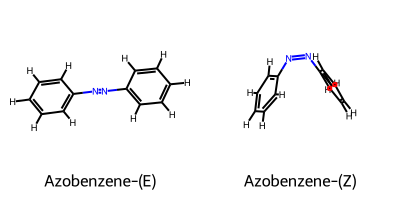

In [115]:
Draw.MolsToGridImage(mols=[azo_E, azo_Z], legends=['Azobenzene-(E)', 'Azobenzene-(Z)'], molsPerRow=2)

Rate constant (k): 0.0000 s^-1


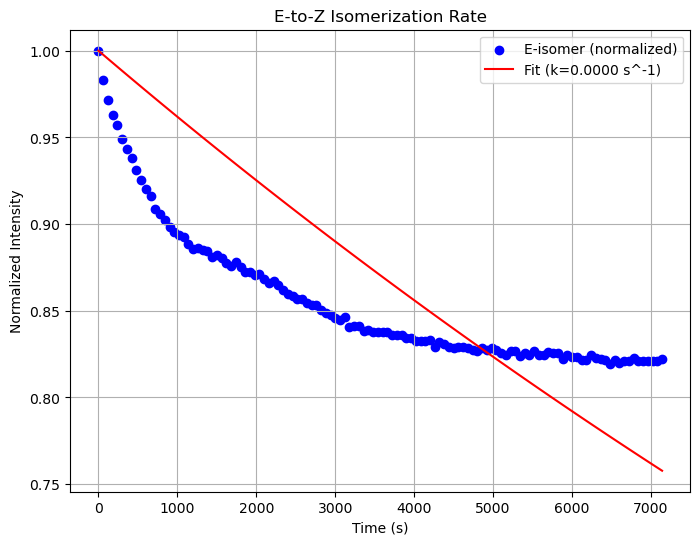

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a first-order decay function
def first_order_decay(t, k):
    return np.exp(-k * t)

# Example DataFrame structure
# The DataFrame should have columns: 'time', 'I_E', 'I_Z'
# 'time' in seconds, 'I_E' and 'I_Z' are intensities for E and Z
# Replace this with your actual data

test = azobenzene_data.copy()

# Normalize intensities (optional, depending on your data)
test["I_E_norm"] = test["E_avg_signal"] / test["E_avg_signal"].iloc[0]

# Fit to the decay model to extract k using E-isomer data
time = test["seconds"].values
I_E_norm = test["I_E_norm"].values

popt, pcov = curve_fit(first_order_decay, time, I_E_norm, p0=0.01)
k = popt[0]

# Print the rate constant
print(f"Rate constant (k): {k:.4f} s^-1")

# Plot the fit
plt.figure(figsize=(8, 6))
plt.scatter(time, I_E_norm, label="E-isomer (normalized)", color="blue")
plt.plot(time, first_order_decay(time, k), label=f"Fit (k={k:.4f} s^-1)", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Intensity")
plt.title("E-to-Z Isomerization Rate")
plt.legend()
plt.grid(True)
plt.show()
